In [147]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))



from sklearn.model_selection import train_test_split,GridSearchCV,KFold,LeaveOneOut
from sklearn.metrics import precision_score,recall_score,f1_score,classification_report,accuracy_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier





# Any results you write to the current directory are saved as output.

['WA_Fn-UseC_-HR-Employee-Attrition.csv']


In [110]:
dat=pd.read_csv("../input/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [111]:
dat.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7


In [112]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [113]:
dat.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [114]:
dat['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

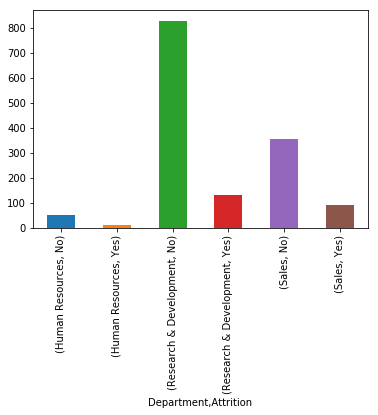

In [115]:
dat.groupby(by=["Department",'Attrition']).size().plot(kind='bar')
plt.show()

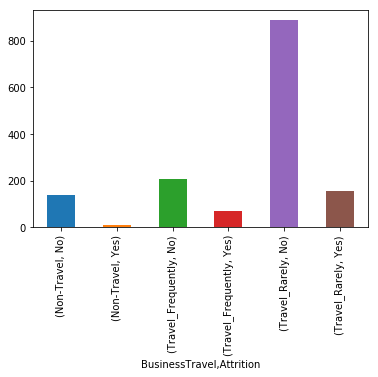

In [116]:
dat.groupby(by=['BusinessTravel','Attrition']).size().plot(kind='bar')
plt.show()

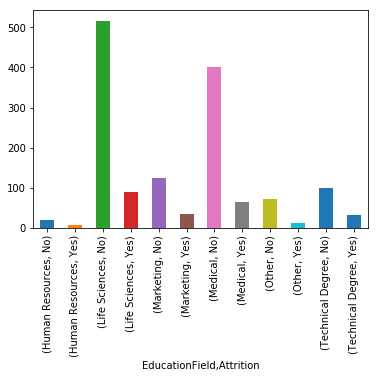

In [117]:
dat.groupby(by=['EducationField','Attrition']).size().plot(kind='bar')
plt.show()

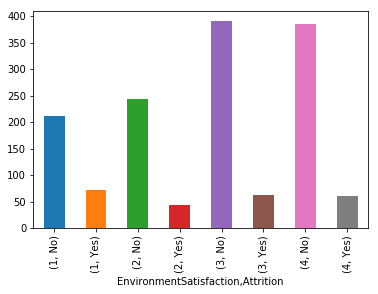

In [118]:

dat.groupby(by=['EnvironmentSatisfaction','Attrition']).size().plot(kind='bar')
plt.show()

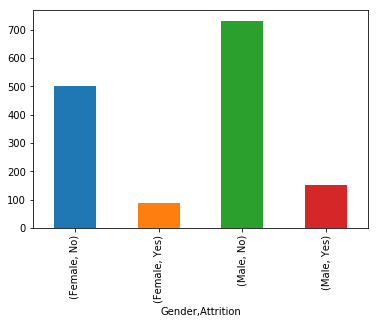

In [119]:
dat.groupby(by=['Gender','Attrition']).size().plot(kind='bar')
plt.show()


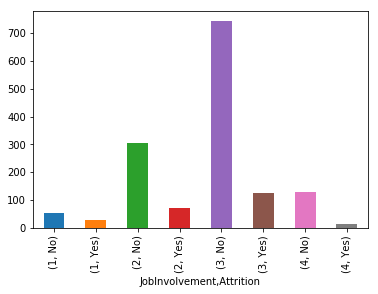

In [120]:
dat.groupby(by=['JobInvolvement','Attrition']).size().plot(kind='bar')
plt.show()






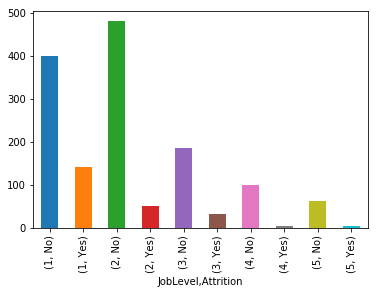

In [121]:
dat.groupby(by=['JobLevel','Attrition']).size().plot(kind='bar')
plt.show()


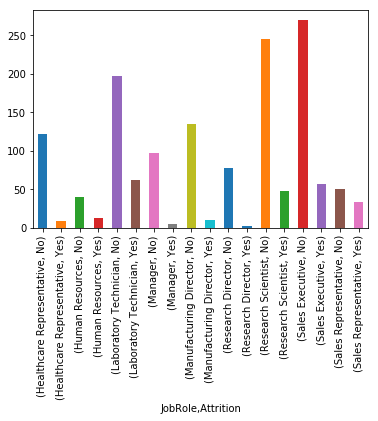

In [122]:
dat.groupby(by=['JobRole','Attrition']).size().plot(kind='bar')
plt.show()
                        

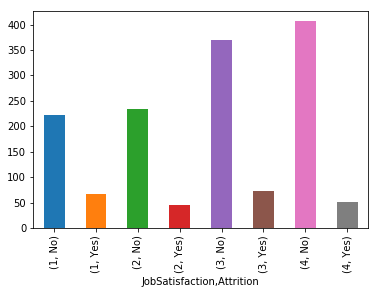

In [123]:
dat.groupby(by=['JobSatisfaction','Attrition']).size().plot(kind='bar')
plt.show()




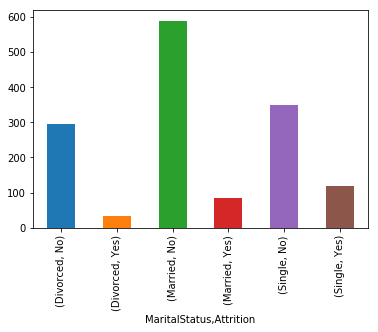

In [124]:
dat.groupby(by=['MaritalStatus','Attrition']).size().plot(kind='bar')
plt.show()

Average monthly income for males is 6380.507936507936
Average monthly income for males is 6686.566326530612


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


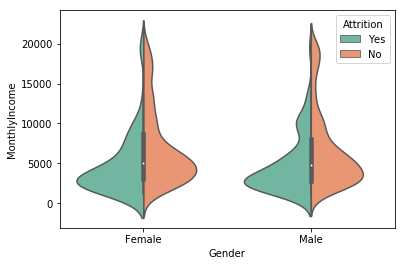

In [125]:
print("Average monthly income for males is {}".format(dat[dat['Gender']=='Male']['MonthlyIncome'].mean()))
print("Average monthly income for males is {}".format(dat[dat['Gender']=='Female']['MonthlyIncome'].mean()))

sns.violinplot(x = 'Gender',y = 'MonthlyIncome',data=dat, hue='Attrition',split=True,palette='Set2')
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


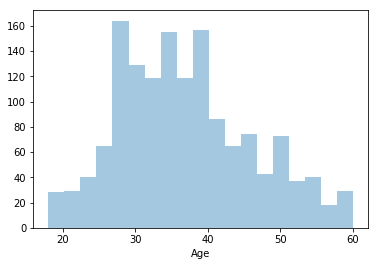

In [126]:
sns.distplot(dat.Age,kde=False)
plt.show()

In [127]:
dat.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [128]:
dat['BusinessTravel'] = dat['BusinessTravel'].astype('category')
dat['Department'] = dat['Department'].astype('category')
dat['EducationField'] = dat['EducationField'].astype('category')
dat['EnvironmentSatisfaction'] = dat['EnvironmentSatisfaction'].astype('category')
dat['Gender'] = dat['Gender'].astype('category')
dat['JobInvolvement'] = dat['JobInvolvement'].astype('category')
dat['JobLevel'] = dat['JobLevel'].astype('category')
dat['JobRole'] = dat['JobRole'].astype('category')
dat['JobSatisfaction'] = dat['JobSatisfaction'].astype('category')
dat['MaritalStatus'] = dat['MaritalStatus'].astype('category')
dat['NumCompaniesWorked'] = dat['NumCompaniesWorked'].astype('category')
dat['OverTime'] = dat['OverTime'].astype('category')
dat['RelationshipSatisfaction'] = dat['RelationshipSatisfaction'].astype('category')
dat['StockOptionLevel'] = dat['StockOptionLevel'].astype('category')
dat['WorkLifeBalance'] = dat['WorkLifeBalance'].astype('category')

In [129]:
#This will return the percentage of Attrition datasets
dat.Attrition.value_counts(normalize=True)*100
#this shows it is an imbalanced dataset


No     83.877551
Yes    16.122449
Name: Attrition, dtype: float64

Spliiting the dataset


In [130]:
x=dat.drop(columns=['Attrition'])

In [131]:
y=dat['Attrition']

In [132]:
x=pd.get_dummies(x)

In [133]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=42)

In [134]:
print(X_train.shape)
print(y_train.shape)

(984, 86)
(984,)


Gini********

In [135]:
modelgini=DecisionTreeClassifier(criterion='gini')

In [137]:
modelgini.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [138]:
predictors_gini=modelgini.predict(X_test)

Entropy

In [139]:
modelentropy=DecisionTreeClassifier(criterion='entropy')

In [140]:
modelentropy.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [141]:
predictors_entropy=modelentropy.predict(X_test)

Confusion_Matrix

In [142]:
Matrix_Gini=confusion_matrix(y_test,predictors_gini)
Matrix_Entropy=confusion_matrix(y_test,predictors_entropy)


print("confusion matrix for gini = \n",Matrix_Gini)

print("confusion matrix for Entropy = \n",Matrix_Entropy)

confusion matrix for gini = 
 [[364  52]
 [ 45  25]]
confusion matrix for Entropy = 
 [[363  53]
 [ 49  21]]


In [144]:
#Accuracy Score
print("Accuracy Score for Gini :",accuracy_score(y_test,predictors_gini))
print("Accuracy Score for Entropy :",accuracy_score(y_test,predictors_entropy))

Accuracy Score for Gini : 0.8004115226337448
Accuracy Score for Entropy : 0.7901234567901234


In [148]:
#Classification Report
print(classification_report(y_test,predictors_gini))
print(classification_report(y_test,predictors_entropy))

              precision    recall  f1-score   support

          No       0.89      0.88      0.88       416
         Yes       0.32      0.36      0.34        70

   micro avg       0.80      0.80      0.80       486
   macro avg       0.61      0.62      0.61       486
weighted avg       0.81      0.80      0.80       486

              precision    recall  f1-score   support

          No       0.88      0.87      0.88       416
         Yes       0.28      0.30      0.29        70

   micro avg       0.79      0.79      0.79       486
   macro avg       0.58      0.59      0.58       486
weighted avg       0.80      0.79      0.79       486



Pruning the Tree

In [151]:
clf_pruned=DecisionTreeClassifier(criterion='gini',max_depth=3,max_leaf_nodes=5)
clf_pruned.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=5, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [153]:
predictors_pruned=clf_pruned.predict(X_test)

In [154]:
#Confusion matrix

mat_pruned = confusion_matrix(y_test,predictors_pruned)

print("confusion matrix = \n",mat_pruned)

confusion matrix = 
 [[410   6]
 [ 61   9]]


In [156]:
#Accuracy Score
print("Accuracy Score is : {}".format(accuracy_score(y_test,predictors_pruned)))

Accuracy Score is : 0.8621399176954733


In [159]:
print(classification_report(y_test,predictors_pruned))

              precision    recall  f1-score   support

          No       0.87      0.99      0.92       416
         Yes       0.60      0.13      0.21        70

   micro avg       0.86      0.86      0.86       486
   macro avg       0.74      0.56      0.57       486
weighted avg       0.83      0.86      0.82       486

